In [1]:
#importing libraries
import pandas as pd

#read dataset
data = pd.read_csv("zoo.csv")

In [2]:
#reading basic information from dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


[1 2 3 4 5 6 7]


<Axes: xlabel='class_type'>

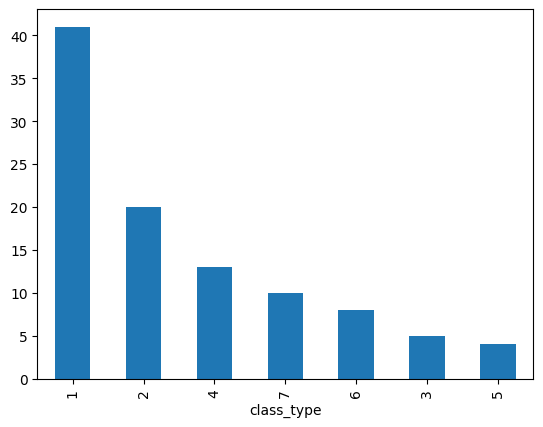

In [6]:
#Output shows that there are 18 columns with a total of 101 values with no null values

#extracting unique number of high level classes
import numpy as np
labels = data['class_type']
print(np.unique(labels.values))

#using matplotlib to demonstrate data onto a graph
import matplotlib.pyplot as plt
%matplotlib inline

#creating figure and a set of subplots
fig,ax = plt.subplots()
(labels.value_counts()).plot(ax=ax, kind = 'bar')


From the plot we can see that there are 7 unique class labels. It is also clear that clustering should be performed

In [8]:
#printing entries
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
#extracting features leaving labels column and storing them into another dataframe
features = data.values[:,1:-1]
features.shape

(101, 16)

In [13]:
#importing necessary libraries to performe Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

#specifying total number of clusters as 7, specify linkage as average and similiart as cosine
#Note: I am only doing this since are there 7 unique class labels
model = AgglomerativeClustering(n_clusters=7, linkage = "average", affinity = "cosine")

In [14]:
#fit the data
model.fit(features)

c:\Users\vrajp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [16]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

In [17]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [18]:
#subtracting 1 such that it matches predicted numbers
labels = labels-1

In [19]:
#predicting accuracy of model
from sklearn.metrics import mean_squared_error

In [23]:
score = mean_squared_error(labels, model.labels_)

In [24]:
#evalutae absolute error by applying square root operation on MSE
abs_error = np.sqrt(score)
print(abs_error)

2.4373333911071624
